In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de Dados


### Titanic


In [3]:
data = pd.read_csv('titanic/train.csv')

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

In [6]:
data['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

### Matplotlib


In [7]:
%matplotlib inline

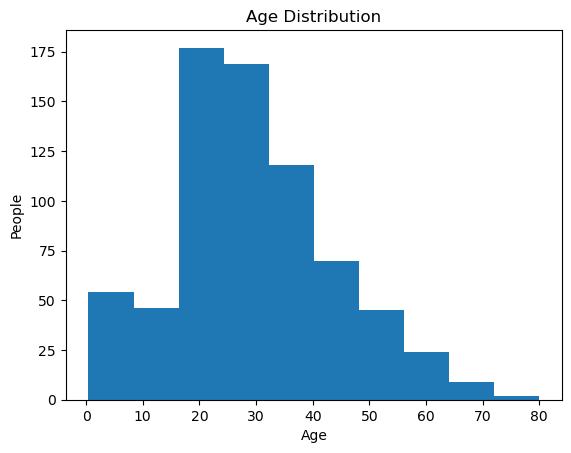

In [8]:
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')
plt.ylabel('People')
plt.xlabel('Age')
plt.show()

In [9]:
data['Pclass'].unique()

array([3, 1, 2])

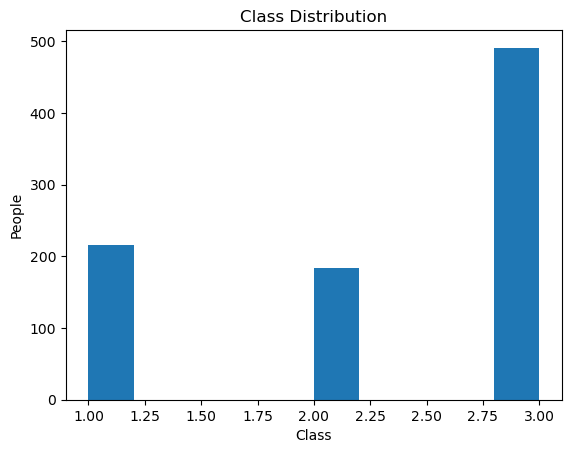

In [10]:
plt.hist(data['Pclass'])
plt.title('Class Distribution')
plt.ylabel('People')
plt.xlabel('Class')
plt.show()

### Subplots - 1ª Forma


<function matplotlib.pyplot.show(close=None, block=None)>

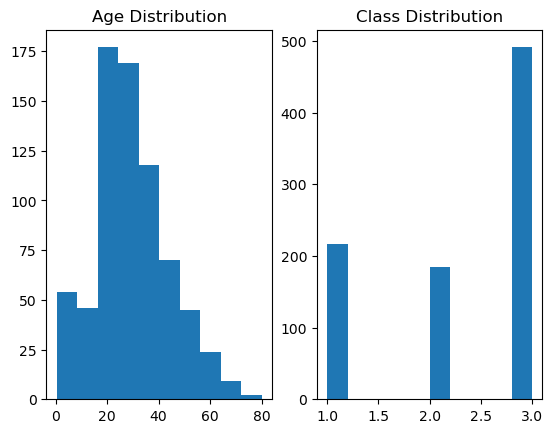

In [11]:
plt.subplot(1, 2, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.show

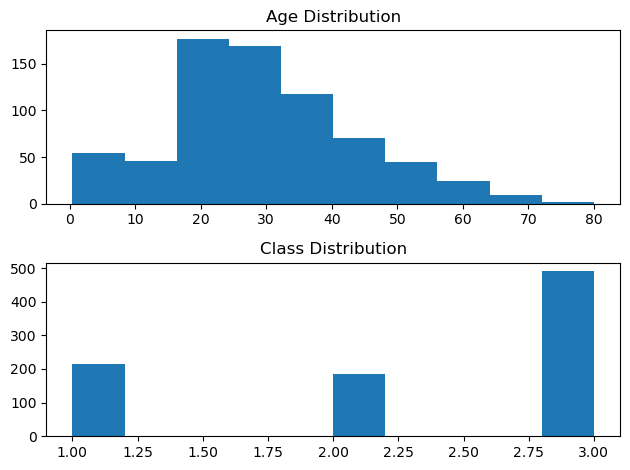

In [12]:
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

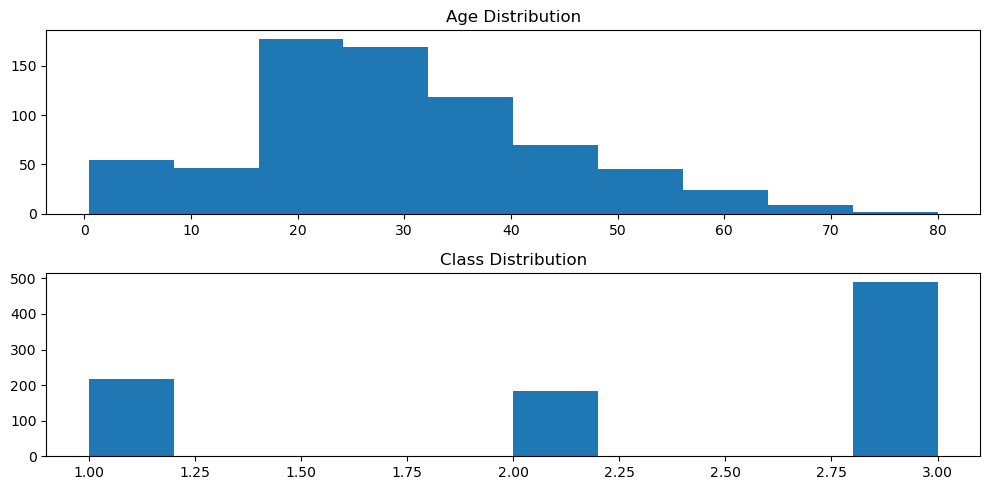

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

### Subplots - 2ª Forma


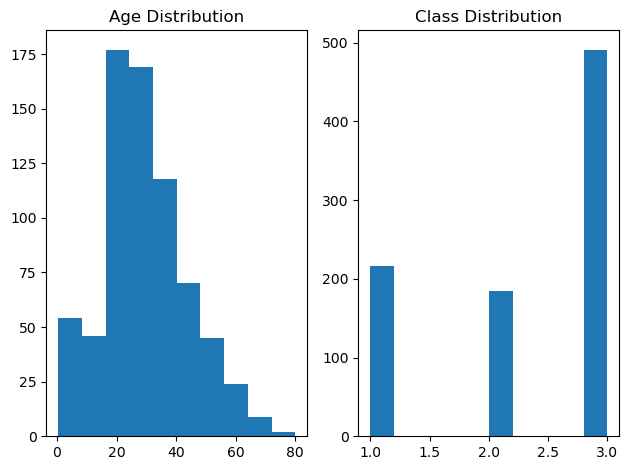

In [14]:
f, ax = plt.subplots(1, 2)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

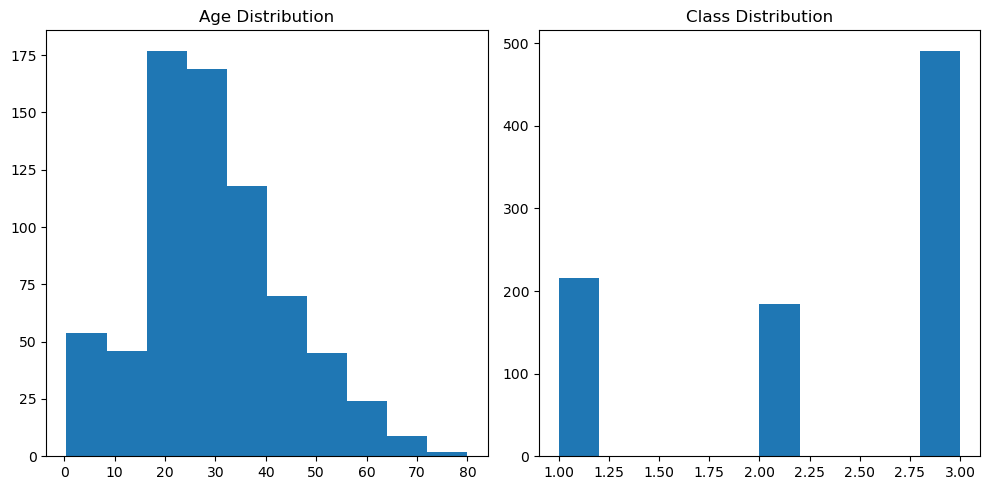

In [15]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

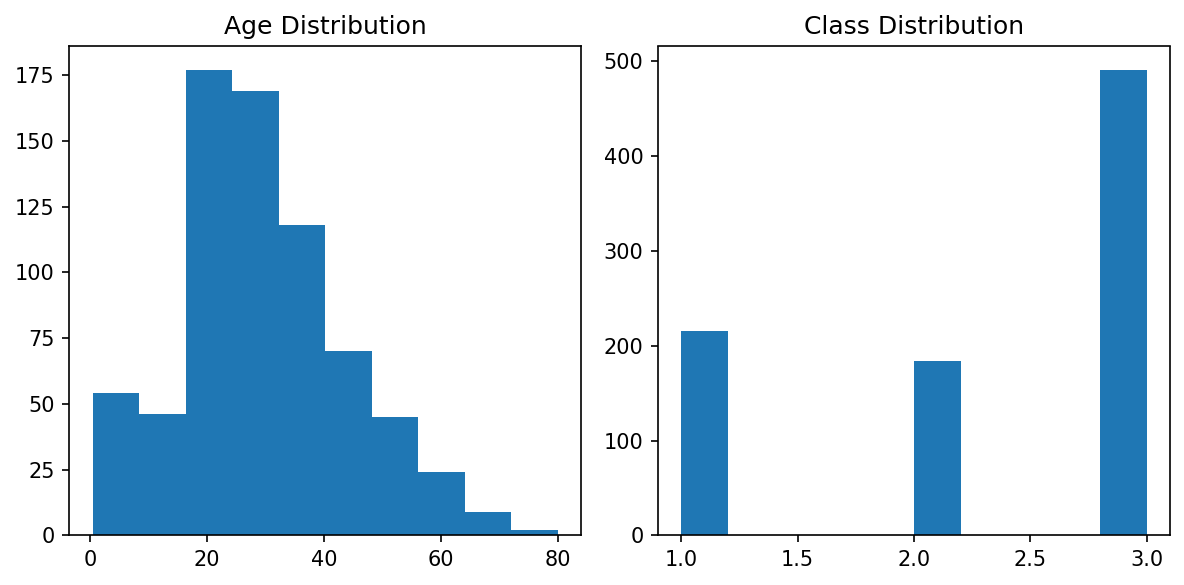

In [16]:
f, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

### Seaborn


In [17]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### pie e countplot


<Axes: xlabel='Sex', ylabel='count'>

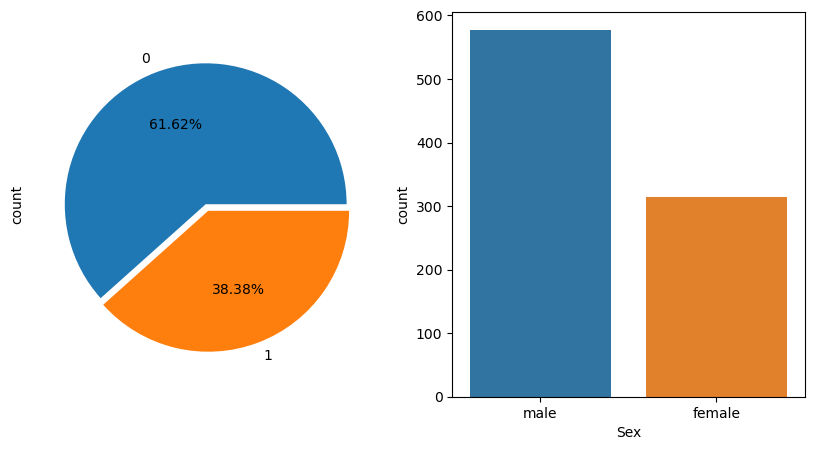

In [20]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Survived'].value_counts().plot.pie(
    ax=ax[0], explode=[0, 0.05], autopct='%0.2f%%')  # type:ignore

sns.countplot(data, x='Sex', ax=ax[1], hue='Sex')

### countplot e hue


<Axes: xlabel='Sex', ylabel='count'>

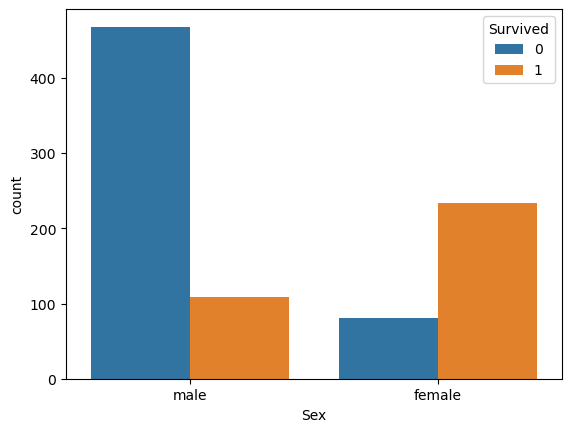

In [21]:
sns.countplot(data, x='Sex', hue='Survived')

### boxplot


<Axes: xlabel='Pclass', ylabel='Age'>

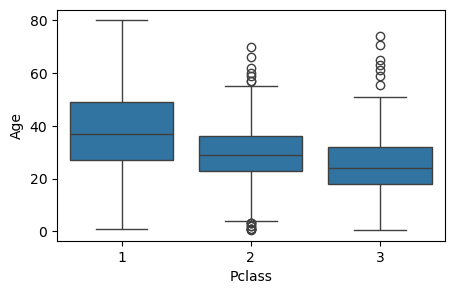

In [22]:
plt.figure(figsize=(5, 3), dpi=100)
sns.boxplot(x='Pclass', y='Age', data=data)

<Axes: xlabel='Pclass', ylabel='Age'>

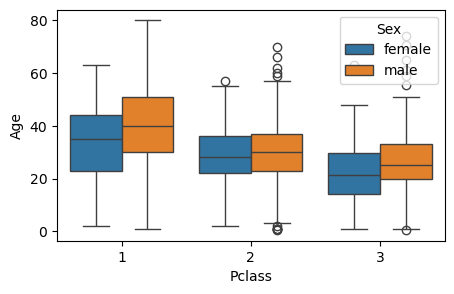

In [23]:
plt.figure(figsize=(5, 3), dpi=100)
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data)

### violinplot


<Axes: xlabel='Pclass', ylabel='Age'>

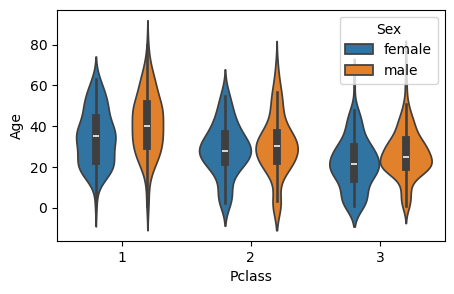

In [24]:
plt.figure(figsize=(5, 3), dpi=100)
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=data)

### FacetGrid com hist


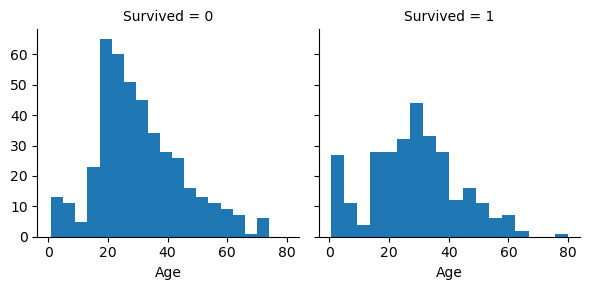

In [25]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=18)

### FacetGrid com barplot


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


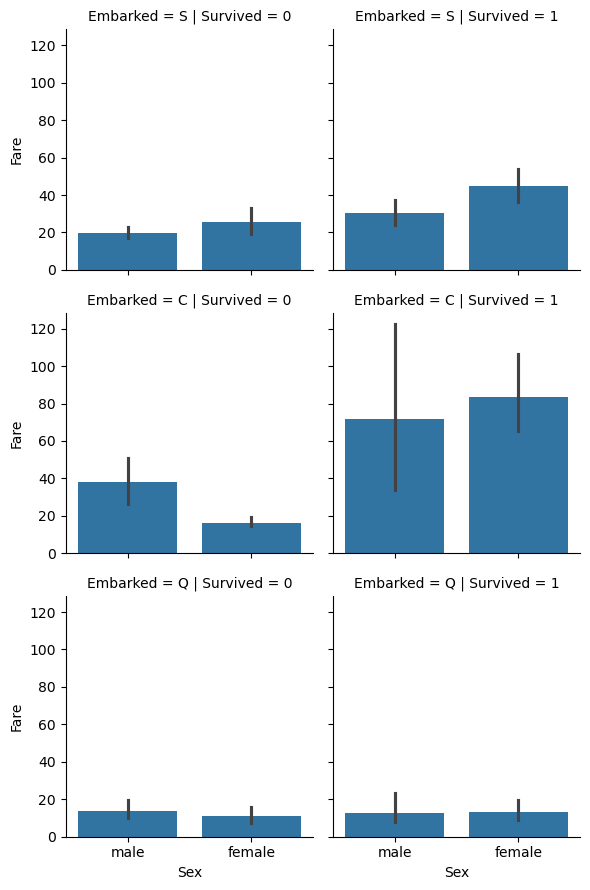

In [27]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


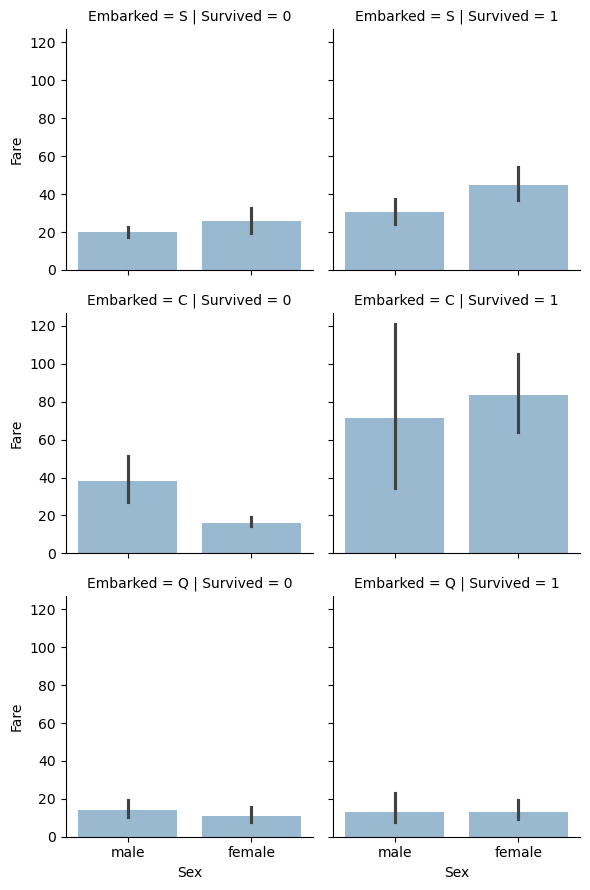

In [28]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


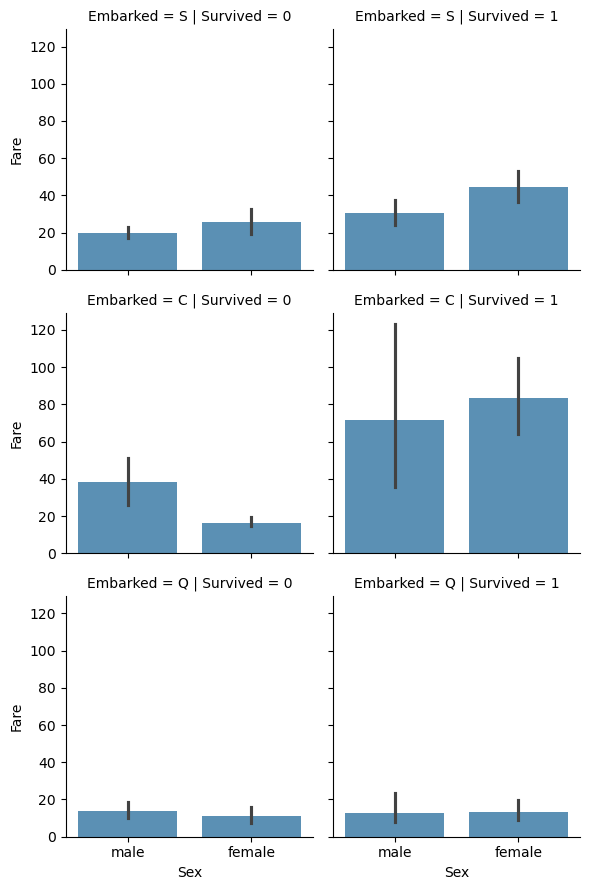

In [29]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.8)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


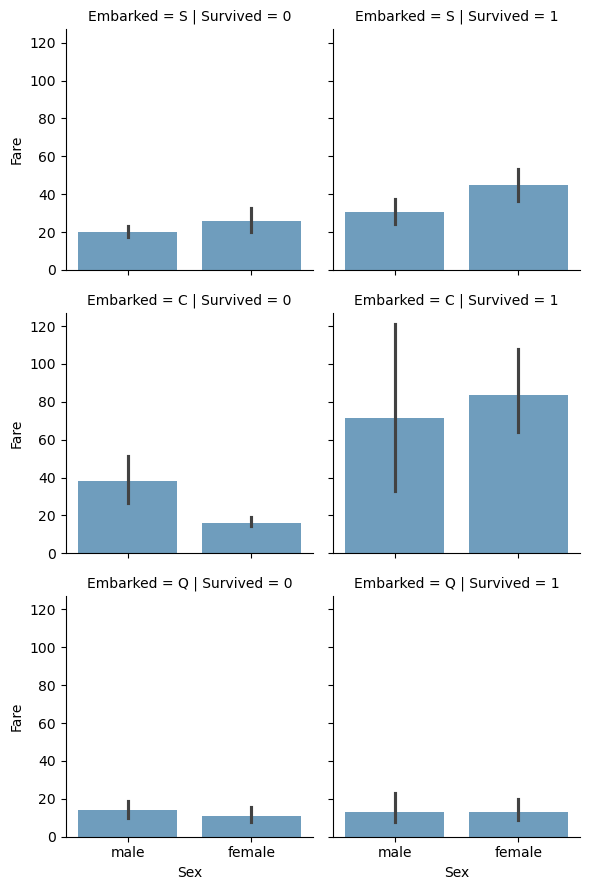

In [30]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.7, errorbar=('ci', 95))

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


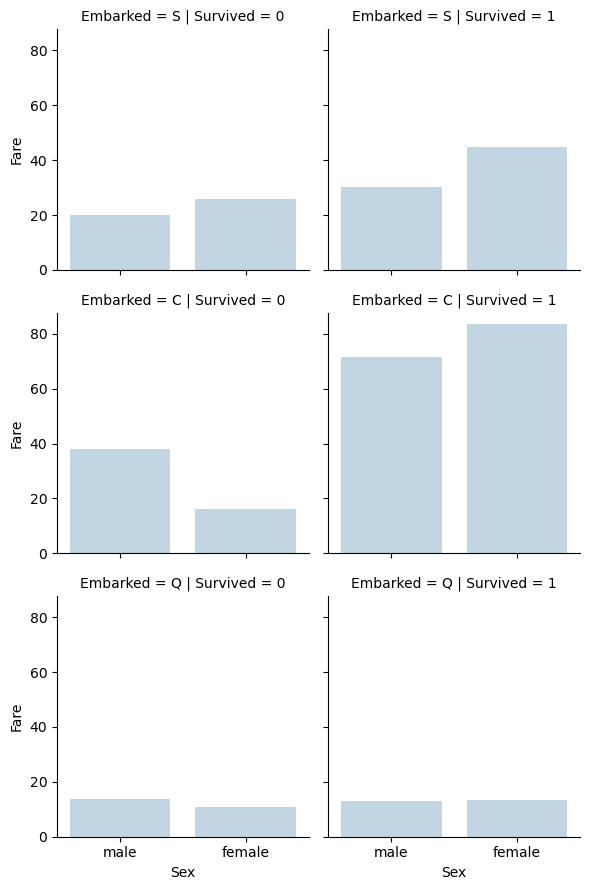

In [31]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.3, errorbar=None)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


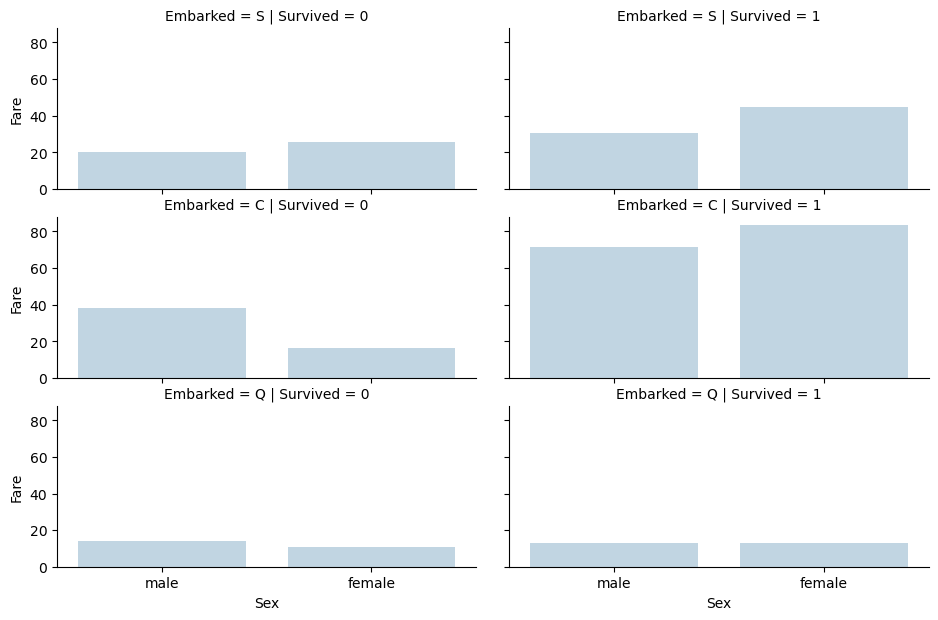

In [32]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.3, errorbar=None)

fig = plt.gcf()
fig.set_size_inches(10, 6)

### FacetGrid com distplot


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

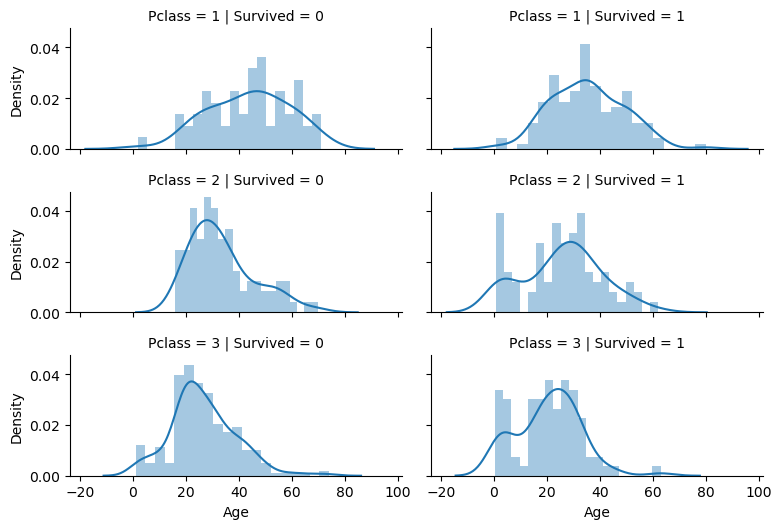

In [33]:
g = sns.FacetGrid(data, col='Survived', row='Pclass', height=1.8, aspect=2.2)
g.map(sns.distplot, 'Age', bins=20)

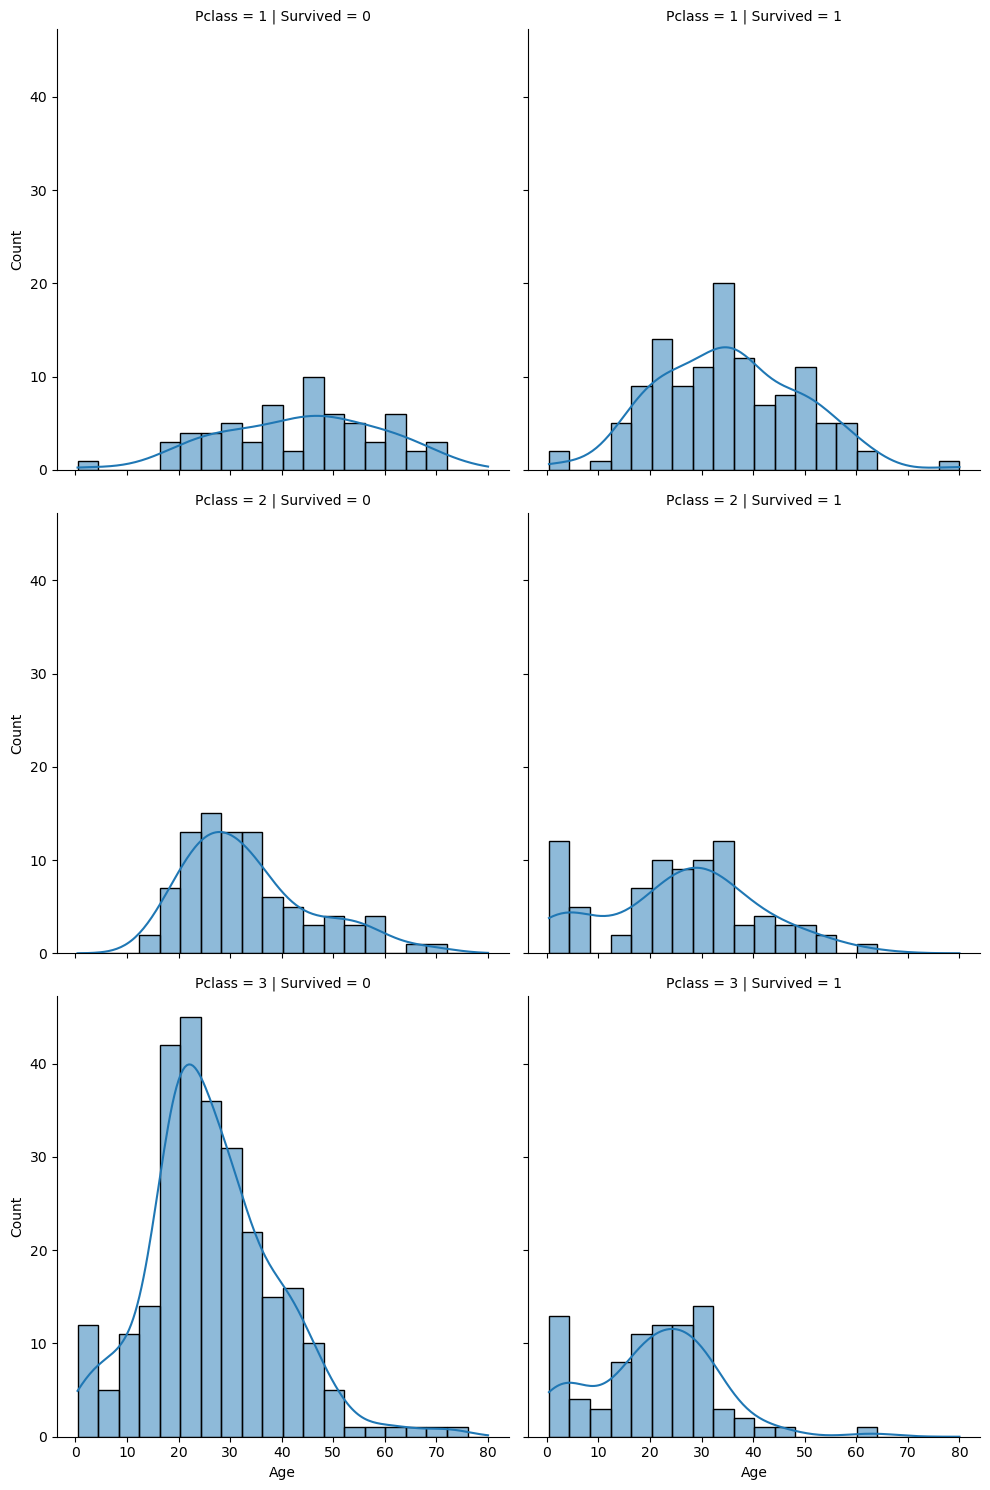

In [34]:
sns.displot(data=data, col='Survived', row='Pclass', x='Age', kde=True)

### catplot do tipo "point"


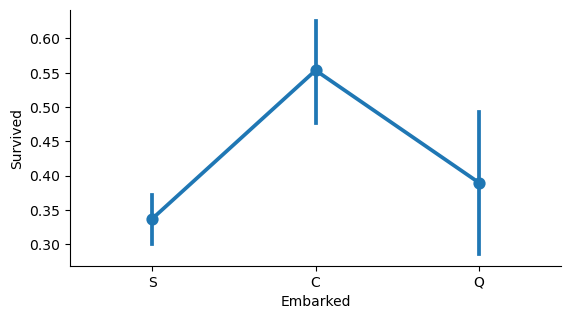

In [35]:
sns.catplot(x="Embarked", y="Survived", data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(6, 3)

### FacetGrid com pointplot


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


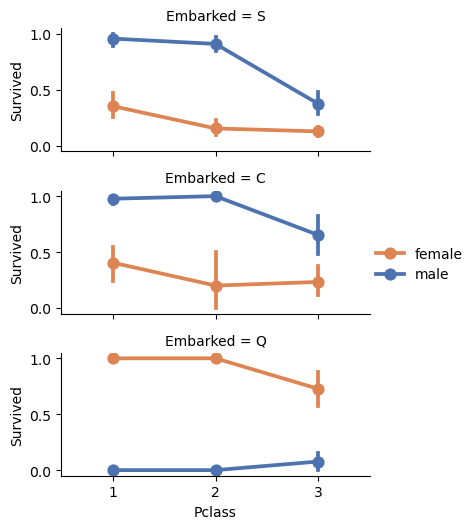

In [36]:
g = sns.FacetGrid(data, row='Embarked', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

### heatmap


In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

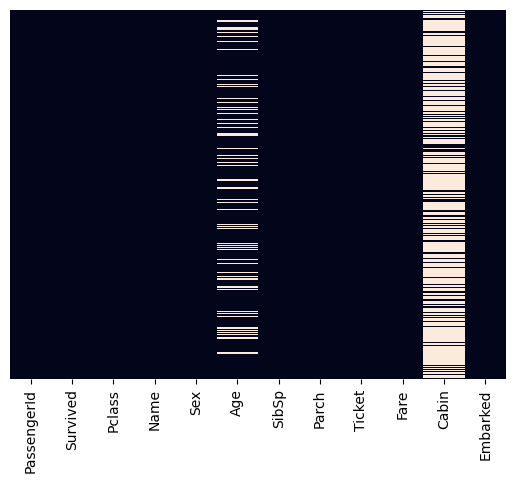

In [38]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

<Axes: >

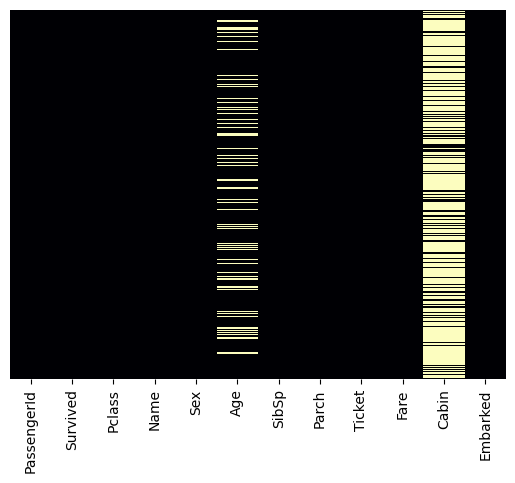

In [39]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### relplot


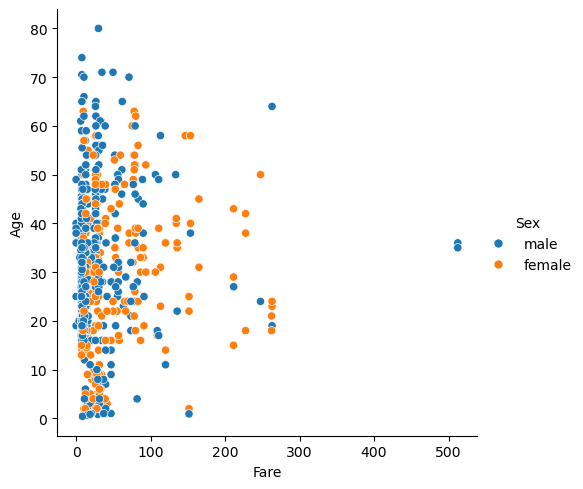

In [40]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data)

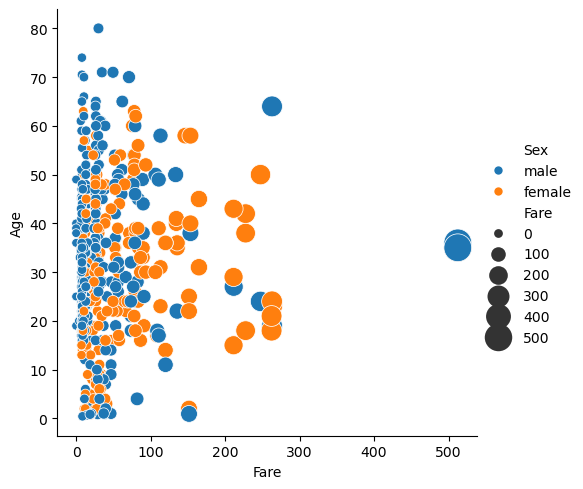

In [41]:
sns.relplot(x='Fare', y='Age', hue='Sex',
            data=data, size="Fare", sizes=(40, 400))

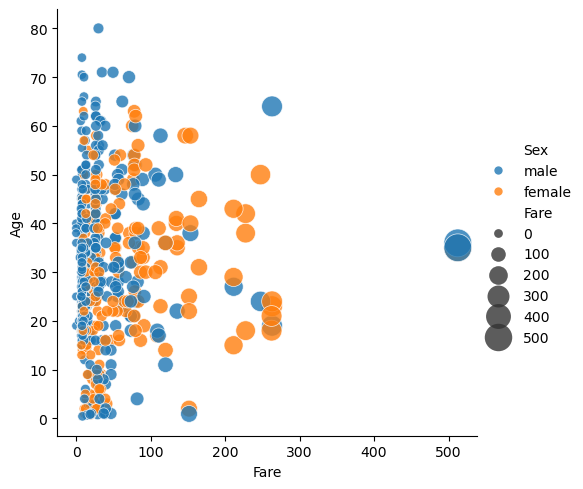

In [42]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data, size="Fare", sizes=(40, 400),
            alpha=0.8)

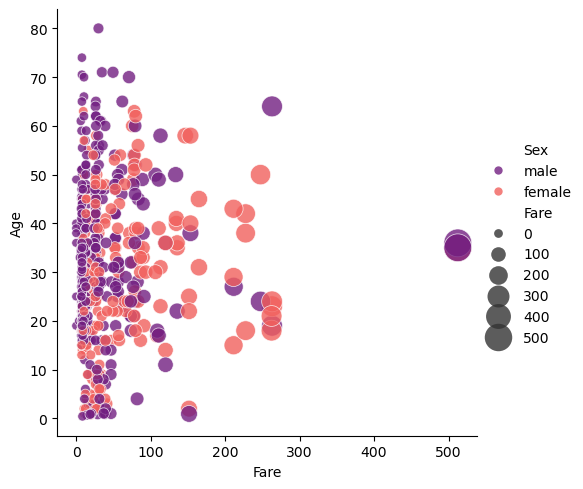

In [43]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data, size="Fare", sizes=(40, 400),
            alpha=0.8, palette='magma')
plt.show()

### scatterplot


<function matplotlib.pyplot.show(close=None, block=None)>

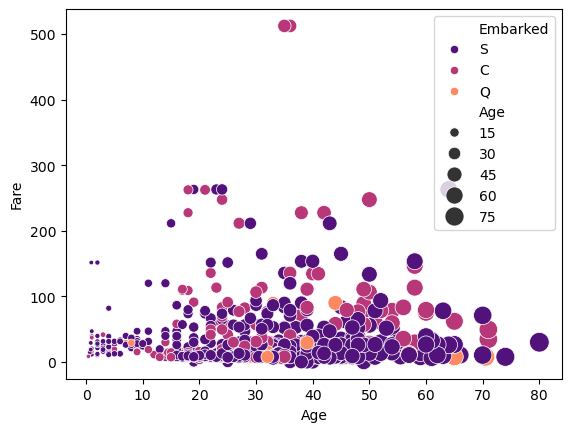

In [44]:
sns.scatterplot(x='Age', y="Fare", hue='Embarked', size="Age", palette='magma',
                data=data, sizes=(10, 200))
plt.show

### pairplot


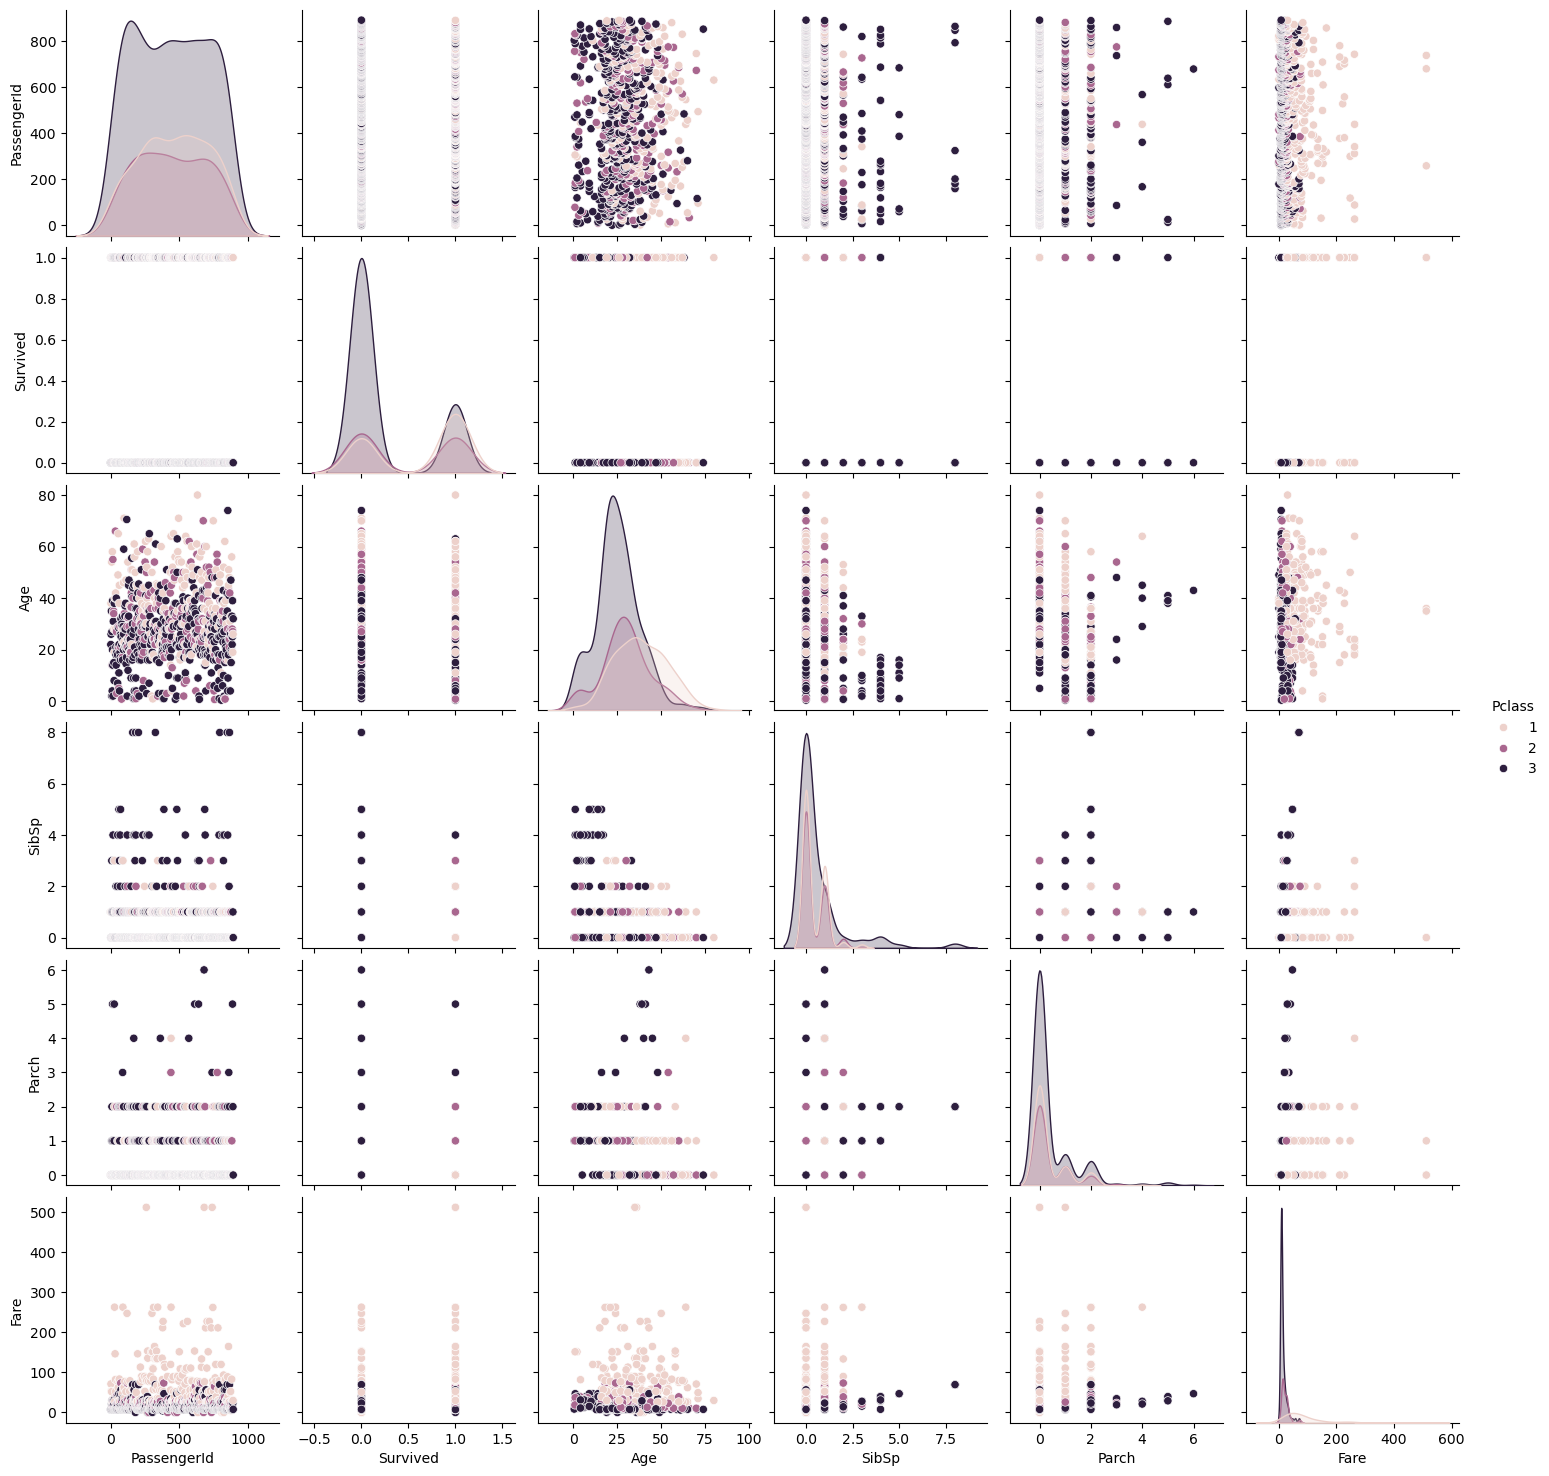

In [46]:
sns.pairplot(data, hue='Pclass')
plt.show()

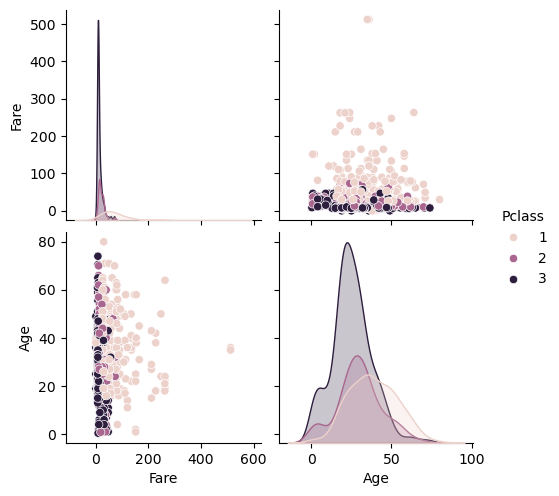

In [58]:
sns.pairplot(data[['Fare', 'Age', 'Pclass']], hue='Pclass')
plt.show()

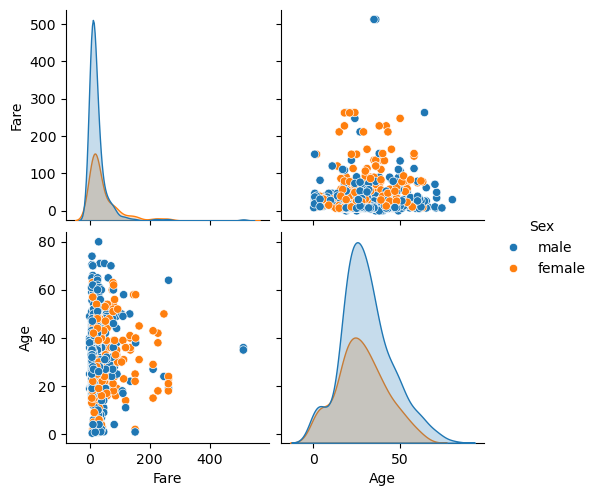

In [61]:
sns.pairplot(data[['Fare', 'Age', 'Sex']], hue='Sex')
plt.show()

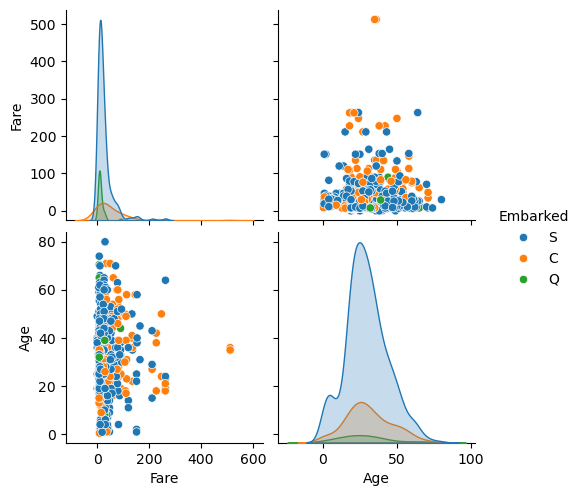

In [63]:
sns.pairplot(data[['Fare', 'Age', 'Embarked']], hue='Embarked')
plt.show()

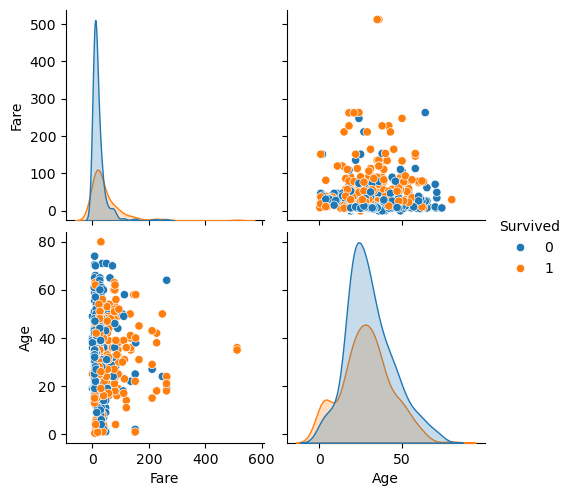

In [65]:
sns.pairplot(data[['Fare', 'Age', 'Survived']], hue='Survived')
plt.show()

### jointplot tipo "kde"


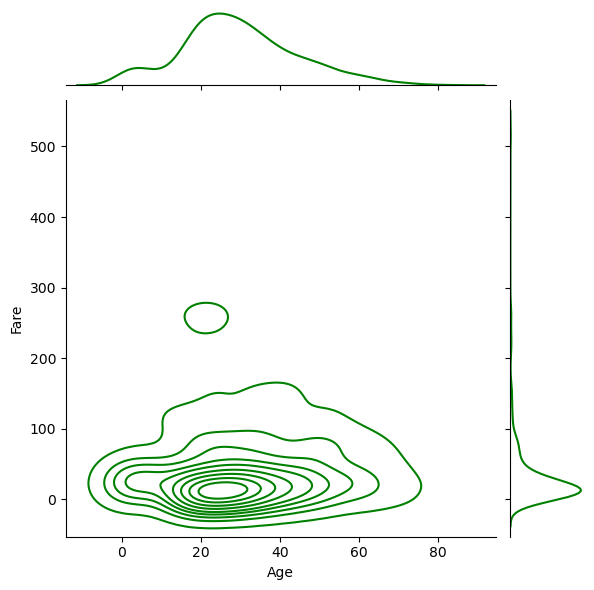

In [67]:
sns.jointplot(x='Age', y='Fare', data=data, kind='kde', color='g')
plt.show()

### jointplot tipo "reg"


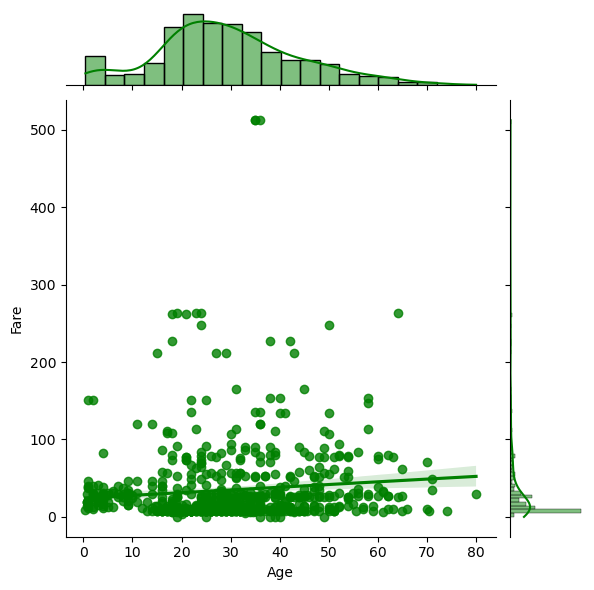

In [68]:
sns.jointplot(x='Age', y='Fare', data=data, kind='reg', color='g')
plt.show()

### kdeplot


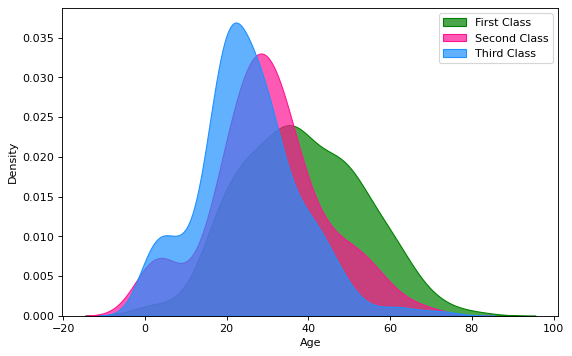

In [94]:
plt.figure(figsize=(8, 5), dpi=80)
sns.kdeplot(data=data['Age'].loc[data['Pclass'] == 1],  # type: ignore
            fill=True, color='g', label='First Class', alpha=0.7)
sns.kdeplot(data=data['Age'].loc[data['Pclass'] == 2],  # type: ignore
            fill=True, color='deeppink', label='Second Class', alpha=0.7)
sns.kdeplot(data=data['Age'].loc[data['Pclass'] == 3],  # type: ignore
            fill=True, color='dodgerblue', label='Third Class', alpha=0.7)
plt.legend()
plt.show()

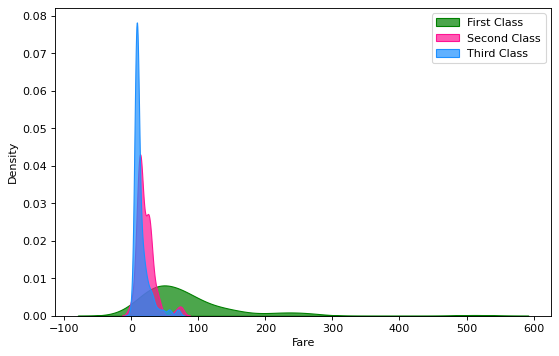

In [95]:
plt.figure(figsize=(8, 5), dpi=80)
sns.kdeplot(data=data['Fare'].loc[data['Pclass'] == 1],  # type: ignore
            fill=True, color='g', label='First Class', alpha=0.7)
sns.kdeplot(data=data['Fare'].loc[data['Pclass'] == 2],  # type: ignore
            fill=True, color='deeppink', label='Second Class', alpha=0.7)
sns.kdeplot(data=data['Fare'].loc[data['Pclass'] == 3],  # type: ignore
            fill=True, color='dodgerblue', label='Third Class', alpha=0.7)
plt.legend()
plt.show()

### catplot do tipo "count"


In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


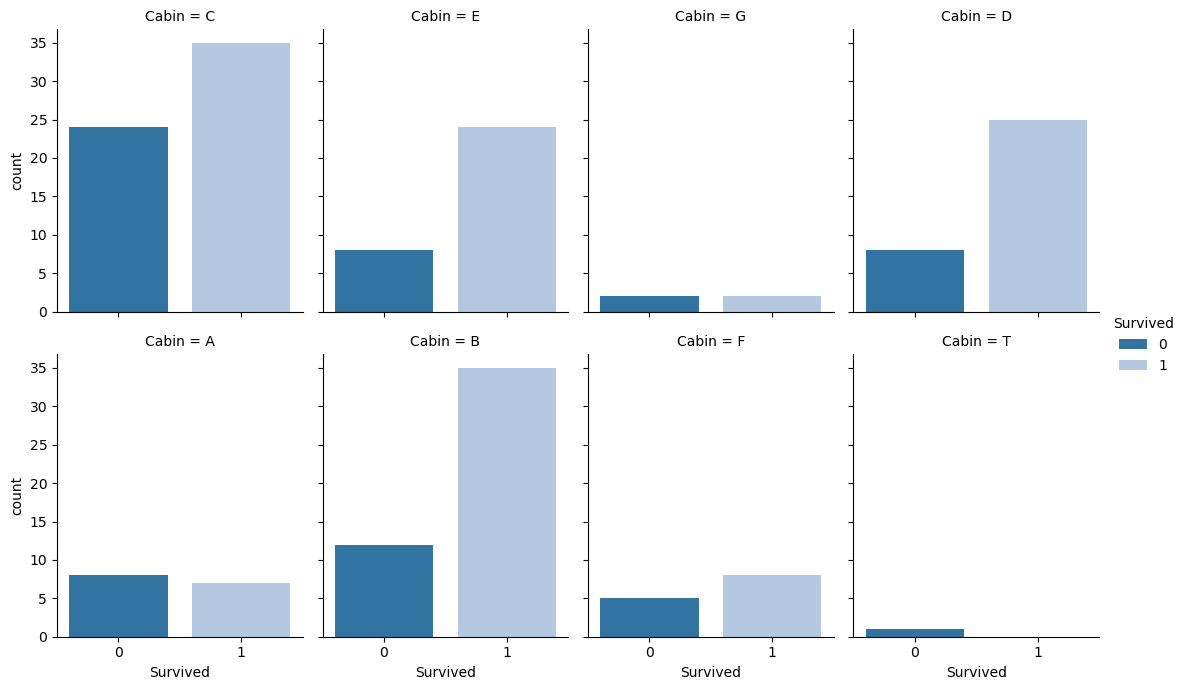

In [109]:
sns.catplot(x='Survived', col='Cabin', data=data[['Survived', 'Cabin']].dropna(),
            kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20',
            hue='Survived')
plt.show()

### heatmap corr()


<Axes: >

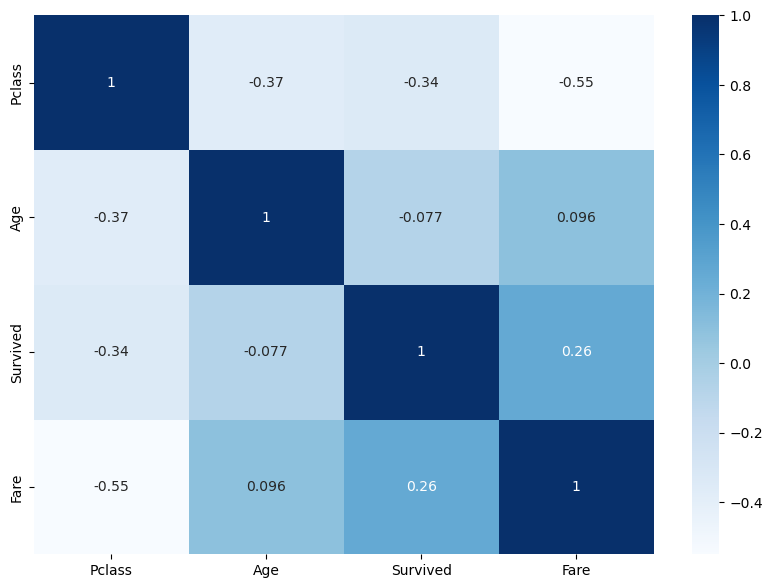

In [117]:
plt.figure(figsize=(10, 7))
sns.heatmap(data[['Pclass', 'Age', 'Survived', 'Fare']].corr(), cmap='Blues',
            annot=True)

In [119]:
data[['Pclass', 'Age', 'Survived', 'Fare']].corr()

,Pclass,Age,Survived,Fare
Pclass,1.000000,-0.369226,-0.338481,-0.549500
Age,-0.369226,1.000000,-0.077221,0.096067
Survived,-0.338481,-0.077221,1.000000,0.257307
Fare,-0.549500,0.096067,0.257307,1.000000


In [123]:
data2 = pd.get_dummies(data=data, columns=['Embarked'], drop_first=True)

In [126]:
data2[['Pclass', 'Age', 'Survived', 'Fare', 'Embarked_Q', 'Embarked_S']].corr()

,Pclass,Age,Survived,Fare,Embarked_Q,Embarked_S
Pclass,1.000000,-0.369226,-0.338481,-0.549500,0.221009,0.081720
Age,-0.369226,1.000000,-0.077221,0.096067,-0.022405,-0.032523
Survived,-0.338481,-0.077221,1.000000,0.257307,0.003650,-0.155660
Fare,-0.549500,0.096067,0.257307,1.000000,-0.117216,-0.166603
Embarked_Q,0.221009,-0.022405,0.003650,-0.117216,1.000000,-0.496624
Embarked_S,0.081720,-0.032523,-0.155660,-0.166603,-0.496624,1.000000


<Axes: >

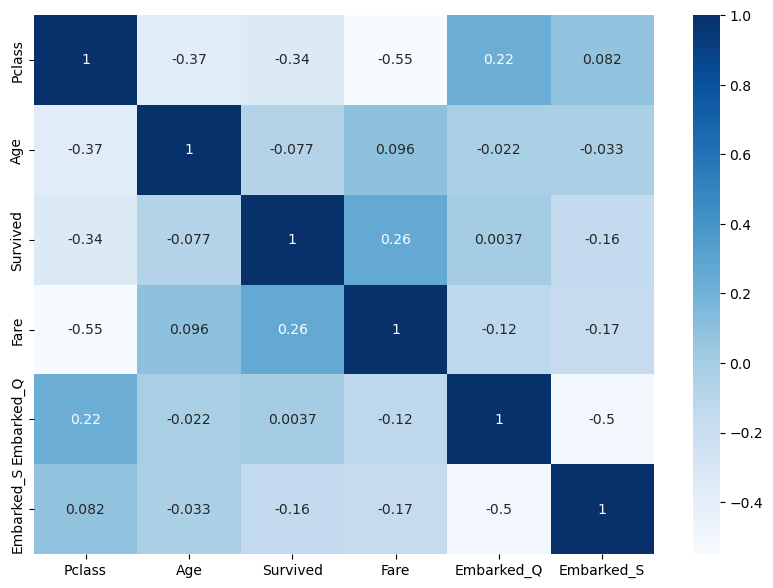

In [127]:
plt.figure(figsize=(10, 7))
sns.heatmap(data2[['Pclass', 'Age', 'Survived', 'Fare', 'Embarked_Q', 'Embarked_S']].corr(),
            cmap='Blues', annot=True)

### plot


In [128]:
x = np.random.normal(10, 1, 15)

In [129]:
x

array([11.25412412,  9.15871134, 10.34763656, 12.07729155,  9.17121326,
       10.64617229, 12.25738743,  9.40060293, 11.61561819,  9.05966827,
        9.66913551,  9.76650279, 11.73357549,  8.06189012,  8.05795718])

In [130]:
len(x)

15

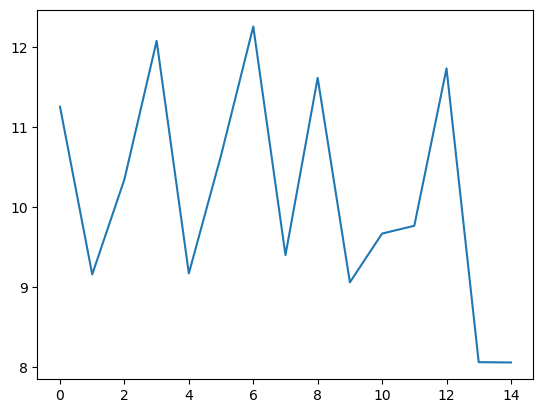

In [131]:
plt.plot(x)
plt.show()

### linspace


In [133]:
x = np.linspace(0, 20, 1000)

In [134]:
x

array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.54054054,  0.56056056,  0.58058058,
        0.6006006 ,  0.62062062,  0.64064064,  0.66066066,  0.68068068,
        0.7007007 ,  0.72072072,  0.74074074,  0.76076076,  0.78078078,
        0.8008008 ,  0.82082082,  0.84084084,  0.86086086,  0.88088088,
        0.9009009 ,  0.92092092,  0.94094094,  0.96096096,  0.98098098,
        1.001001  ,  1.02102102,  1.04104104,  1.06106106,  1.08108108,
        1.1011011 ,  1.12112112,  1.14114114,  1.16116116,  1.18118118,
        1.2012012 ,  1.22122122,  1.24124124,  1.26126126,  1.28128128,
        1.3013013 ,  1.32132132,  1.34134134,  1.36136136,  1.38

In [135]:
len(x)

1000

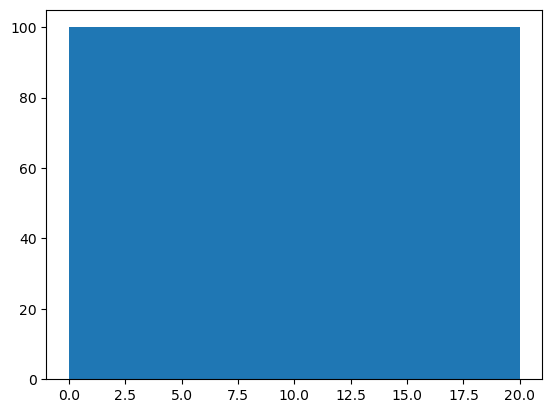

In [137]:
plt.hist(x)
plt.show()

In [138]:
y = 2*x + 5

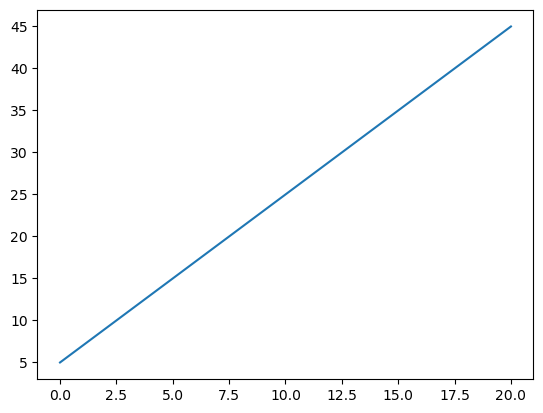

In [139]:
plt.plot(x, y)
plt.show()

In [140]:
y = 2*x**2 + 5*x + 3

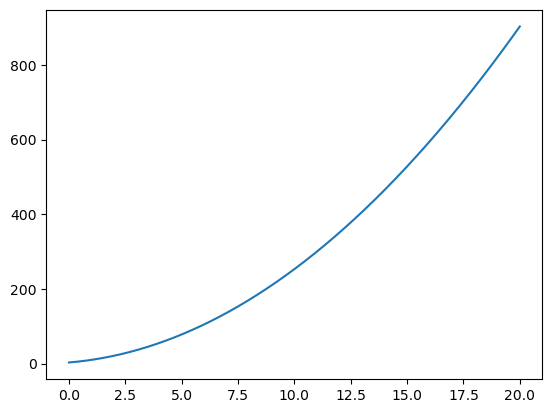

In [142]:
plt.plot(x, y)
plt.show()

In [143]:
y = 9*x**3 + 2*x**2 + 5*x + 3

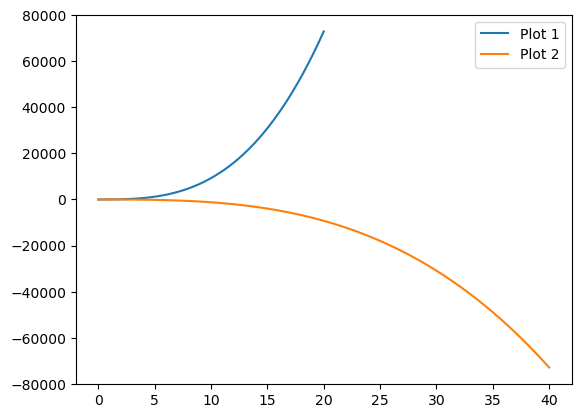

In [148]:
plt.plot(x, y, label='Plot 1')
plt.plot(x*2, -y, label='Plot 2')
plt.legend()
plt.show()

### normal


In [149]:
y = np.random.normal(8, 2, 1000)

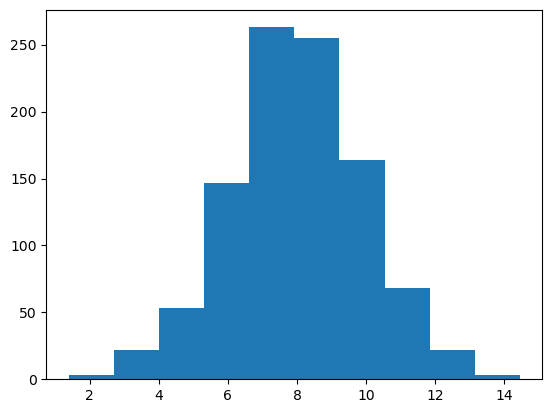

In [152]:
plt.hist(y)
plt.show()

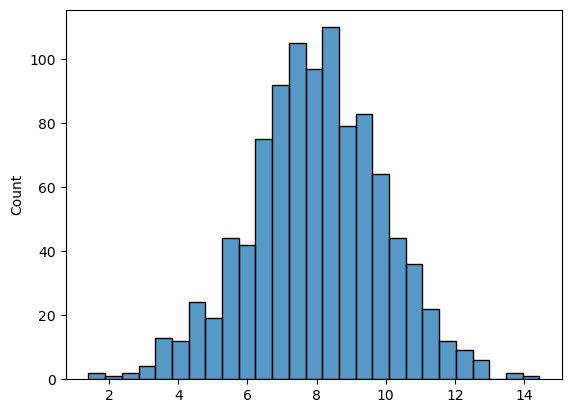

In [155]:
sns.histplot(y)
plt.show()

Fontes:

- https://matplotlib.org/gallery/index.html
- https://seaborn.pydata.org/examples/index.html
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
- https://matplotlib.org/tutorials/colors/colormaps.html
